0.028 0.022
0.023 0.019


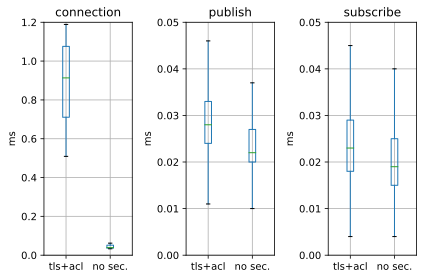

In [30]:
import pandas as pd
import matplotlib
import matplotlib.pyplot 

d = {'connect_wsec_ms': [], 'publish_wsec_ms': [], 'subscribe_wsec_ms': [], 'connect_nosec_ms': [], 'publish_nosec_ms': [], 'subscribe_nosec_ms': []}

file = open('server_time_sec_5_13.log', 'r')
lines = file.read().splitlines()
file.close()

for line in lines:
    if not line:
        continue
    if 'handle__connect::' in line:
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['connect_wsec_ms'].append(time_s*1000);
    if 'handle__publish::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['publish_wsec_ms'].append(time_s*1000);
    if 'handle__subscribe::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['subscribe_wsec_ms'].append(time_s*1000);

file = open('server_time_nosec_5_13.log', 'r')
lines = file.read().splitlines()
file.close()

for line in lines:
    if not line:
        continue
    if 'handle__connect::' in line:
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['connect_nosec_ms'].append(time_s*1000);
    if 'handle__publish::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['publish_nosec_ms'].append(time_s*1000);
    if 'handle__subscribe::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['subscribe_nosec_ms'].append(time_s*1000);       
        
df1 = pd.DataFrame(d['connect_wsec_ms'])
df2 = pd.DataFrame(d['publish_wsec_ms'])
df3 = pd.DataFrame(d['subscribe_wsec_ms'])
df4 = pd.DataFrame(d['connect_nosec_ms'])
df5 = pd.DataFrame(d['publish_nosec_ms'])
df6 = pd.DataFrame(d['subscribe_nosec_ms'])

df_connect = pd.concat([df1.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)
df_publish = pd.concat([df2.reset_index(drop=True), df5.reset_index(drop=True)], axis=1)
df_subscribe = pd.concat([df3.reset_index(drop=True), df6.reset_index(drop=True)], axis=1)

df_connect.columns = ['tls+acl', 'no sec.']
df_publish.columns = ['tls+acl', 'no sec.']
df_subscribe.columns = ['tls+acl', 'no sec.']

%config InlineBackend.figure_formats = ['svg']
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=3) # 3 subplots

bp = df_connect.boxplot(ax=axes[0], column=['tls+acl', 'no sec.'], showfliers=False)
bp.set_title('connection')
bp.set_ylabel('ms')
bp.axis(ymin=0, ymax=1.2)

bp = df_publish.boxplot(ax=axes[1], column=['tls+acl', 'no sec.'], showfliers=False)
bp.set_title('publish')
bp.set_ylabel('ms')
bp.axis(ymin=0, ymax=.05)

bp = df_subscribe.boxplot(ax=axes[2], column=['tls+acl', 'no sec.'], showfliers=False)
bp.set_title('subscribe')
bp.set_ylabel('ms')
bp.axis(ymin=0, ymax=.05)

fig.tight_layout() # spacing between sub plots

print(df_publish['tls+acl'].median(), df_publish['no sec.'].median())
print(df_subscribe['tls+acl'].median(), df_subscribe['no sec.'].median())
